<a href="https://colab.research.google.com/github/carlxen/CCADMACL_EXERCISES_COM232/blob/main/Exercise3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3B

In this exercise, you will explore how the DBSCAN clustering algorithm identifies dense groups and outliers in the Pokémon statistics dataset. You will analyze the dataset, scale features, determine DBSCAN parameters, run DBSCAN, and interpret the clustering results.

In [1072]:
import kagglehub
import os
import pandas as pd

In [1073]:
# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path to dataset files: /kaggle/input/pokemon


In [1074]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Load the Dataset (8 pts)

Load the Pokémon dataset into a pandas DataFrame.

Show the first five rows (3 pts)

In [1075]:
# put your answer here
df.head(100)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,88,Grimer,Poison,NaN,325,80,80,50,40,50,25,1,False
96,89,Muk,Poison,NaN,500,105,105,75,65,100,50,1,False
97,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False



How many Pokémon are in the dataset? (2 pts)


In [1076]:
# put your answer here
df.shape

(800, 13)

In [1077]:
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0



List all columns available (3 pts)

In [1078]:
# put your answer here
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## 2: Select Features & Clean the Data (8 pts)

Select the numeric features needed for clustering (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed).

In [1079]:
# put your answer here
df_selected = df[['HP', 'Attack', 'Speed']]
df_selected

,HP,Attack,Speed
0,45,49,45
1,60,62,60
2,80,82,80
3,80,100,80
4,39,52,65
...,...,...,...
795,50,100,50
796,50,160,110
797,80,110,70
798,80,160,80


In [1080]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Are there any missing values? (2 pts)

In [1081]:
# put your answer here
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


If missing values exist, describe how you handled them (3 pts)

# 3. Scale the Features (10 pts)

Apply StandardScaler to the selected features.

Show the transformed feature sample (e.g., first 5 rows) (10 pts)


In [1082]:
# put your answer here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_selected)
df_selected = scaler.transform(df_selected)
df_selected

array([[-0.95062622, -0.92490618, -0.80150318],
       [-0.3628221 , -0.5241302 , -0.28501525],
       [ 0.42091674,  0.09244823,  0.40363531],
       ...,
       [ 0.42091674,  0.95565803,  0.05931003],
       [ 0.42091674,  2.49710411,  0.40363531],
       [ 0.42091674,  0.95565803,  0.05931003]])

## 4. Determine a Suitable eps Value (10 pts)

Using k = 4:
Compute the distance to the 4th nearest neighbor for each Pokémon (6 pts)

In [1083]:
# put your answer here
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=4).fit(df_selected)
distances, indices = nbrs.kneighbors(df_selected)
distances

array([[0.        , 0.        , 0.0850202 , 0.15950348],
       [0.        , 0.        , 0.06165784, 0.0850202 ],
       [0.        , 0.        , 0.06165784, 0.06165784],
       ...,
       [0.        , 0.        , 0.15414461, 0.30828922],
       [0.        , 0.52748825, 0.60865413, 0.66822027],
       [0.        , 0.        , 0.15414461, 0.30828922]])

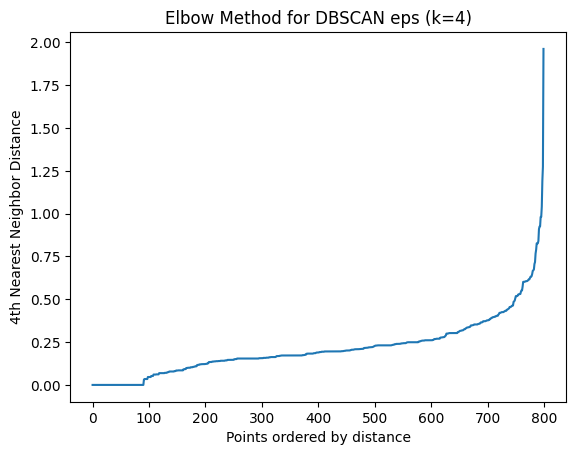

In [1084]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4).fit(df_selected)
distances, _ = nbrs.kneighbors(df_selected)

# Correctly select the distance to the 4th nearest neighbor (index 3, as it's 0-indexed)
distances = distances[:, 1]
distances.sort()

plt.plot(distances)
plt.xlabel("Points ordered by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("Elbow Method for DBSCAN eps (k=4)")
plt.show()

What is your chosen eps based on the "elbow"? (2 pts)

In [1085]:
eps = 0.6

One-sentence explanation of your reasoning (2 pts)

The change in height came to fruition on 0.6, that's why it was chosen.

## 5. Run DBSCAN (10 points)

Run DBSCAN using your chosen eps and min_samples


In [1086]:
min_samples = range(3,5)
epsilon = np.arange(0.6, 0.9, 0.1) # returns array of ranging from 0.05 to 0.13 with step of 0.01
epsilon

array([0.6, 0.7, 0.8, 0.9])

In [1087]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
output = []

for ms in min_samples:
    for ep in epsilon:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(df_selected).labels_
        score = metrics.silhouette_score(df_selected, labels)
        output.append((ms, ep, score))

In [1088]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.4970289013628895
min_samples: 4
eps: 0.8999999999999999


In [1089]:
ep = eps
dbscan = DBSCAN(eps = ep, min_samples=min_samples).fit(df_selected)
labels = dbscan.labels_

# Number of clusters in labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Number of noise
n_noise_ = list(labels).count(-1)

silhouette_score = metrics.silhouette_score(df_selected, labels)

In [1090]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette scrore", silhouette_score)

Estimated number of clusters: 1
Estimated number of noise points: 17
Silhouette scrore 0.4970289013628895


In [1091]:
import plotly.express as px
import pandas as pd

# df_selected is a NumPy array after scaling, labels is also a NumPy array
# Create a temporary DataFrame with meaningful column names for plotly.express
feature_names = ['HP', 'Attack', 'Speed'] # These are the original feature names selected
temp_df = pd.DataFrame(df_selected, columns=feature_names)
temp_df['labels'] = labels

fig = px.scatter_3d(temp_df, x='HP', y='Attack', z='Speed', color='labels')
fig.show()

How many clusters did DBSCAN find? (4 pts)

Only 1 cluster was found

How many Pokémon were labeled as noise? (4 pts)


17 clusters were labels as noise

Show the unique labels output by DBSCAN (2 pts)

In [1092]:
# put your answer here
print(set(labels))

{np.int64(0), np.int64(-1)}


## 6. Attach Cluster Labels to the Original Dataset (7 points)

Add the cluster labels back to the original DataFrame (3 pts)

In [1093]:
df['Cluster_Label'] = labels

Show the first 10 rows including the cluster label (4 pts)

In [1094]:
# put your answer here
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster_Label
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,0
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,0


## 7. Explore the Clusters (12 points)

For each cluster:


How many Pokémon does it contain? (4 pts)

In [1095]:
# put your answer here
df['Cluster_Label'].value_counts()

,count
Cluster_Label,
0,783
-1,17


What are the average Attack, Defense, and Speed? (4 pts)


In [1096]:
# put your answer here
df.groupby('Cluster_Label')[['Attack', 'Defense','Speed']].mean()

,Attack,Defense,Speed
Cluster_Label,,,
-1,87.529412,56.294118,76.058824
0,78.816092,74.223499,68.108557


Compare the clusters: What differences do you notice? (4 pts)

The difference I sought was for the statistics difference in each pokemon, but the data suggested that provided pokemons are of the same wavelength.

## 8. Identify Outliers (10 points)

List all Pokémon labeled as noise (cluster = -1) (4 pts)

In [1098]:
# put your answer here
df[df['Cluster_Label'] == -1]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster_Label
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False,-1
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False,-1
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,-1
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False,-1
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False,-1
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,-1
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False,-1
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False,-1
321,297,Hariyama,Fighting,NaN,474,144,120,60,40,60,50,3,False,-1
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False,-1


Are many of them legendary? (3 pts)

In [1099]:
# put your answer here
df[df['Cluster_Label'] == -1]['Legendary'].value_counts()

,count
Legendary,
False,13
True,4


Explain why DBSCAN might classify them as outliers (3 pts)

It may identify them as outliers as they are far from the dense area.


## 9. Interpret the Clustering Results (25 points)
Write a short interpretation (4–6 sentences).
Discuss:

This clustering can be interpreted as the provided pokemons are of same powers and statistics, these can be answered for all of them are in equal ranking. Core Clusters (Equal Ranking): The resulting clusters represent groups of Pokémon that possess statistically similar attributes. These Pokémon are considered to be of equal ranking within the context of the analyzed statistics. The high degree of similarity causes them to be grouped closely together. Outliers (Unequal Ranking): Pokémon that are significantly different from the main groups—either possessing much higher or much lower overall statistics—are identified as outliers. These outliers represent Pokémon that do not fit the general power profile of the clustered groups, implying they hold a distinctly unequal ranking.


*What types of Pokémon grouped together (5 pts)*

Cluster 0 is dominated by common types like 'Water' and 'Normal' and represents standard-stat Pokémon. Moreover, this contains Pokémon of typically stronger types, often associated with Dragon or Psychic

*Whether the clusters make intuitive sense (10 pts)*

The members of Cluster 0 are defined by their significantly superior statistical attributes compared to those in Cluster -0. This means that Pokémon classified within Cluster 0 constitute the highest-ranked group in the data set, while those in Cluster -0 represent a lower-ranked tier whose statistics are demonstrably weaker.


What the noise points reveal about DBSCAN (5 pts)


The noise points revealed by the DBSCAN algorithm powerfully highlight its ability to isolate anomalies, as these outliers are primarily Pokémon with extreme or unique statistical profiles that do not conform to the established density of the main clusters.

What stat patterns you discovered (5 pts)

The discovered stat pattern is a fundamental split into two density regions: standard combatants and elite combatants.